# Inspiral of NS binary with post-Newtonian description

## Import

In [1]:
include("Model_T4.jl")
using DelimitedFiles, Plots, Interpolations

## Taylor T4 formalism with tidal contributions

Following formalism discussed in https://arxiv.org/abs/1301.3555v2 (and references therein). We are assuming stars are static.

### Integration

In [2]:
const KK = (2.997 * 10.0^5)^2/(6.67 * 10.0^-20 * 1.988 * 10.0^30)
const G = 1.;

In [3]:
#Choose modified EOS (the parameters are ap4/sly, Λ and z)
#Note: TOVdata is obtained with NSIntegrator notebook
Λ = -150.0
z = 45
eos = "ap4"
#Data stored are P0/ρu, M, Rs/Lu*10.0^-5, C, k2, λ, I/M^3, λ/M^5
TOVdata = readdlm("TOV_$eos"*"_$Λ"*"_$z.csv");

In [4]:
#Interpolate λ/M^5-M curve
#Important! λ used in calculation needs to be rescaled appropriately with KK^5
_, k = findmax(TOVdata[:,2])
M_array = Interpolations.deduplicate_knots!(TOVdata[1:k,2];move_knots = true)
λ_interp = linear_interpolation(M_array,TOVdata[1:k,8]);

In [5]:
#Choose Ma and Mb
Ma = 2.21
Mb = 2.08
λa = λ_interp(Ma) * KK^5
λb = λ_interp(Mb) * KK^5
q = round(Ma/Mb, digits = 3)
#Choose initial and final separations
d = 50. #70.
dend = 17. #30.
tf = 1000000.
#Choose δt 
δt = .1 #1.
M = Ma + Mb
ν = Ma * Mb / (M^2)
#Choose observer's distance
dobs = 200.
coeff =  2 * G * ν * M / dobs

#Solve ODEs system for x and ϕ
sol = integrator()

dumpData(sol, "data_$eos"*"_d$d"*"_q$q"*"_ma$Ma"*"_$Λ"*"_$z.csv")#[t/M x ϕ ω*M ϕ*M h22 Ih22]

### Newmann-Penrose scalar

In [6]:
Λ = -150.0
z = 45
eos = "ap4"
Ma = 2.21
Mb = 2.08
q = round(Ma/Mb, digits = 3)
d = 50.

#Not importing first two lines with initial values and name columns
data = readdlm("data_$eos"*"_d$d"*"_q$q"*"_ma$Ma"*"_$Λ"*"_$z.csv", comments=true, 
    comment_char='#');

In [7]:
Reψ4 = zeros(0)
Imψ4 = zeros(0)

Reψ4, Imψ4 = strain(data);

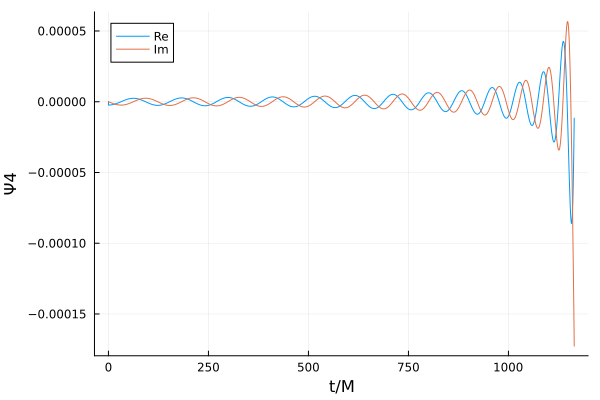

In [8]:
#Example plot
plot(Reψ4, data[:,1],xlabel="t/M",ylabel="Ψ4",label="Re")
plot!(Imψ4, data[:,1],xlabel="t/M",ylabel="Ψ4",label="Im")